 I will start the task of Smartwatch Data Analysis by importing the necessary Python libraries and the dataset:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("data.csv")
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Before moving forward, let’s have a look at whether this dataset has any null values or not:

In [4]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# Changing datatype of ActivityDate
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], 
                                      format="%m/%d/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

Look at all the columns; you will see information about very active, fairly active, lightly active, and sedentary minutes in the dataset. Let’s combine all these columns as total minutes before moving forward:

In [8]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
data["TotalMinutes"].sample(5)

687     930
771    1440
295     988
179    1440
623     835
Name: TotalMinutes, dtype: int64

Let’s Analyze the Smartwatch Data

The dataset has a “Calories” column; it contains the data about the number of calories burned in a day. Let’s have a look at the relationship between calories burned and the total steps walked in a day:

In [12]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", color="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()

In [40]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['forestgreen','mediumseagreen', "dodgerblue", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

Observations:

    81.3% of Total inactive minutes in a day
    15.8% of Lightly active minutes in a day
    On an average, only 21 minutes (1.74%) were very active
    and 1.11% (13 minutes) of fairly active minutes in a day

We transformed the data type of the ActivityDate column to the datetime column above. Let’s use it to find the weekdays of the records and add a new column to this dataset as “Day”:

In [36]:
data["Day"] = data["ActivityDate"].dt.day_name()
data["Day"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object

Now let’s have a look at the very active, fairly active, and lightly active minutes on each day of the week:

In [46]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='mediumorchid'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='royalblue'
))
fig.update_layout(barmode='group')
fig.show()

colors = ['forestgreen','mediumseagreen', "dodgerblue", "blue"]

Now let’s have a look at the number of inactive minutes on each day of the week:

In [90]:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','salmon', "pink", "tomato", "orange", "coral", "firebrick"]


fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors))
fig.show()

So Thursday is the most inactive day according to the lifestyle of all the individuals in the dataset. Now let’s have a look at the number of calories burned on each day of the week:

In [89]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors))
fig.show()

Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.

Now, let's analyze the correlations between distances and minutes of activity:

                          VeryActiveMinutes  FairlyActiveMinutes  \
TotalDistance                      0.681297             0.462899   
VeryActiveDistance                 0.826681             0.211730   
ModeratelyActiveDistance           0.225464             0.946934   
LightActiveDistance                0.154966             0.220129   

                          LightlyActiveMinutes  SedentaryMinutes  
TotalDistance                         0.516300         -0.288094  
VeryActiveDistance                    0.059845         -0.061754  
ModeratelyActiveDistance              0.162092         -0.221436  
LightActiveDistance                   0.885697         -0.413552  


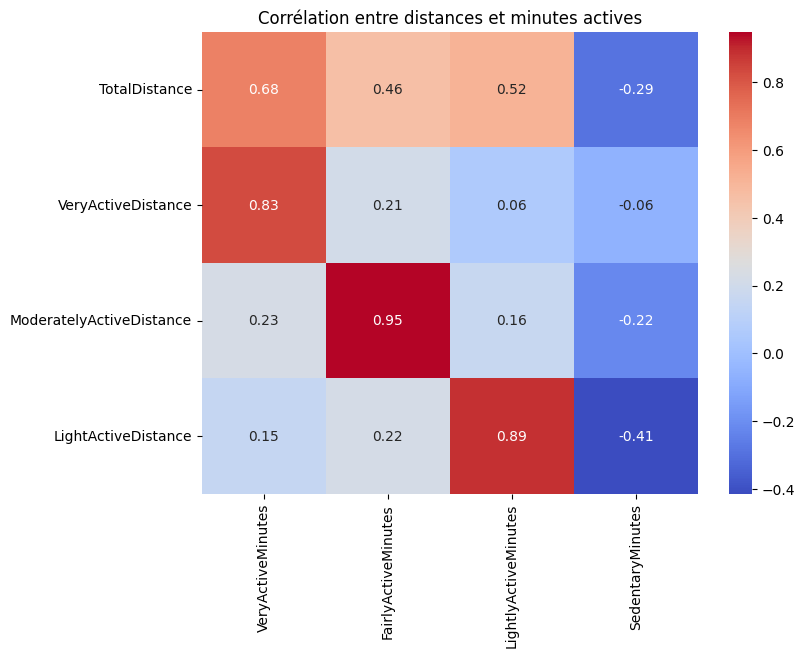

In [102]:
import seaborn as sns

# Liste des colonnes que tu veux analyser
distance_cols = ['TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
minutes_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

# Sous-matrice corrélations : distances vs minutes
correlation_matrix = data[distance_cols + minutes_cols].corr()

# Affiche les corrélations distance <-> minutes seulement
print(correlation_matrix.loc[distance_cols, minutes_cols])

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix.loc[distance_cols, minutes_cols], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre distances et minutes actives")
plt.show()


Correlation Analysis: Distances vs Active Minutes

As expected, there are strong and logically consistent correlations between the types of distances and their corresponding activity durations:

    VeryActiveDistance ↔ VeryActiveMinutes

    ModeratelyActiveDistance ↔ FairlyActiveMinutes

    LightActiveDistance ↔ LightlyActiveMinutes

These results confirm that the more distance covered at a certain intensity level, the more time is spent in that level of activity — which aligns well with intuition and validates the consistency of the data.

In addition, there is a moderately strong but still meaningful correlation between:

    TotalDistance ↔ VeryActiveMinutes

This suggests that very active minutes contribute significantly to the total distance covered throughout the day.

Some other correlations are weaker yet still noticeable, such as:

    TotalDistance ↔ FairlyActiveMinutes

    TotalDistance ↔ LightlyActiveMinutes

Finally, we observe negative correlations between all types of active distances and SedentaryMinutes, especially with LightActiveDistance. This indicates that more physical activity — even light — generally corresponds to less time spent being sedentary.

Now I will do a k means on users based on their activity:

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

user_features = data.groupby("Id")[[
    "TotalDistance",
    "VeryActiveDistance",
    "ModeratelyActiveDistance",
    "LightActiveDistance",
    "VeryActiveMinutes",
    "FairlyActiveMinutes",
    "LightlyActiveMinutes",
    "Calories"
]].mean().reset_index()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_features.drop("Id", axis=1))


kmeans = KMeans(n_clusters=4, random_state=42)
user_features['Cluster'] = kmeans.fit_predict(X_scaled)

user_features.groupby('Cluster').mean()

,Id,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories
Cluster,,,,,,,,,
0,5.095878e+09,2.070951,0.463889,0.201899,1.388590,5.698142,6.011046,83.258490,1998.275193
1,4.937098e+09,6.933982,1.849942,1.012872,3.946056,30.566978,23.885943,204.819654,2567.296223
2,3.954822e+09,4.439907,0.489678,0.276368,3.612220,7.427805,5.952473,244.460023,1962.890821
3,8.465582e+09,12.344032,7.576129,0.380806,4.361290,75.612903,9.758065,192.838710,3183.032258


Interpretation:

    Cluster 3:

        Highest average total distance (12.34 km)
        Highest very active distance (7.58 km)
        Highest very active minutes (75.6 minutes)
        Highest calories burned (3183 kcal)
        → This cluster clearly represents the most active users.

    Cluster 1:

        Relatively high total distance (6.93 km)
        Moderate to high very active minutes (30.57 minutes)
        High calories burned (2567 kcal)
        → Represents users with moderate to high activity levels.

    Cluster 2:

        Moderate total distance (4.44 km) but lower very active distance and minutes
        High lightly active minutes (244.46 minutes)
        → Users with mostly light to moderate activity.

    Cluster 0:

        Lowest distances and very active minutes
        Lowest calories burned (1998 kcal)
        → Represents the least active or mostly sedentary users.

Let's see clusters:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a dictionary for the legend
cluster_labels = {
    0: "Sedentary",
    1: "Moderately Active",
    2: "Lightly Active",
    3: "Very Active"
}
user_features['ActivityLevel'] = user_features['Cluster'].map(cluster_labels)

fig = px.scatter(
    x=X_pca[:,0],
    y=X_pca[:,1],
    color=user_features['ActivityLevel'],
    hover_name=user_features['Id'].astype(str),
    labels={'x':'PCA 1', 'y':'PCA 2', 'color':'Cluster'},
    width=800,
    height=600,
)

#visualization settings
fig.update_layout(
    title="Users clustering (K-Means)",
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=False,
    ),
    yaxis=dict(
        showgrid=False,
    ),
    shapes=[
        dict(
            type="line",
            x0=0,
            x1=0,
            y0=min(X_pca[:,1]),
            y1=max(X_pca[:,1]),
            line=dict(color="lightgrey", width=1)
        ),
        dict(
            type="line",
            x0=min(X_pca[:,0]),
            x1=max(X_pca[:,0]),
            y0=0,
            y1=0,
            line=dict(color="lightgrey", width=1)
        )
    ]
)

fig.show()

,Id,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,Cluster,ActivityLevel
27,8053475328,11.475161,8.514839,0.423871,2.533871,85.161290,9.580645,150.967742,2945.806452,3,Very Active
32,8877689391,13.212903,6.637419,0.337742,6.188710,66.064516,9.935484,234.709677,3420.258065,3,Very Active
